## Задача 2. Шолохов Алексей, 474гр.

In [5]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Будем решать трехдиогональную систему 

$\begin{cases}
u_0 = 0 \\
-u_{n-1}+(2+h^2)u_n - u_{n+1} = 2h^2sin(nh), n \in [1, N-1] \\
u_N = 0 \\
\end{cases}$

где $N = 20$, $h = \frac{\pi}{N}$.

Использовался классический метод прогонки, все обозначения совпадают с этой статьей:

http://e-lib.gasu.ru/eposobia/metody/R_1_3.html

In [65]:
N = 20
u0 = 3
from math import pi
h = pi/N

C = [-1]*(N-1) + [0]
D = [1] + [2+h**2]*(N-1) + [1]
E = [0] + [-1]*(N-1)
f = [0] + [2*(h**2)*sin(h*n) for n in range(1, N)] + [0] 

H1 = [-E[0]/D[0]]
H2 = [f[0]/D[0]]
for i in range(1, N):
    H1.append(-E[i]/(D[i] + C[i-1]*H1[i-1]))
    H2.append((-C[i-1]*H2[i-1] + f[i])/(D[i] + C[i-1]*H1[i-1]))
    
X = [(-C[-1]*H2[-1] + f[-1])/(D[-1] + C[-1]*H1[-1])]

for i in reversed(range(N)):
    X.append(H1[i]*X[N-i-1] + H2[i])

Сравним полученное решение $X$ с теоретическим $X' = sin(nh)$. Видно, что они совпадают почти идеально

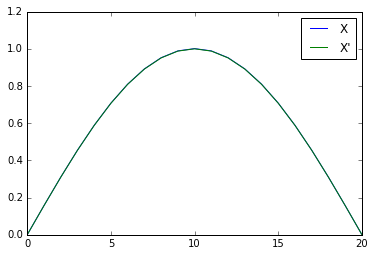

In [66]:
pylab.plot(list(range(N+1)), list(reversed(X)), label="X")
pylab.plot(list(range(N+1)), [np.sin(n*h) for n in range(N+1)], label="X'")
pylab.legend()